# **Final Project**
## **BlueCode Team**

*   Agustina Sri Wardani
*   Fatchul Arifin
*   Ferry Setefanus
*   Gigih Septian
*   Kornelius Rio
*   M. Harun Arrasyid
*   Raza Aqil Maulana

---

**df3**
- Handling data cleansing
- Feature transformasi
- Menghapus outlier dengan metode Z Score


## Role
Kami bertanggung jawab memberikan rekomendasi agar tingkat pembatalan hotel dapat menurun dan memberikan analisa guna meningkatkan kemajuan hotel

# Business Understanding

## Problem
Banyaknya pembatalan pesanan hotel menjadi masalah yang menjadi perhatian tim management karena berhubungan langsung dengan revenue. Berdasarkan sumber dari dataset, tingkat cancellation rate mencapai 37%. Tingkat cancel paling tinggi terjadi pada tahun 2016, sebanyak 46% dari total cancel yang terjadi

## Goal
Menurunkan Cancellation Rate Hotel

## Objective
Membuat model machine learning untuk memprediksi apakah customer akan melakukan cancel atau tidak, sehingga pihak hotel dapat melakukan pendekatan dengan customer yang diprediksi akan cancel



## Business Metric
Cancellation rate

# Load Data

In [ ]:
! pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.8 MB/s 
     |████████████████████████████████| 965 kB 46.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats

In [ ]:
df = pd.read_csv('hotel_booking.csv')

## Descriptive Statistic

In [ ]:
df.sample(5)

hotel  is_canceled  lead_time  arrival_date_year  \
57946    City Hotel            1        285               2016   
12465  Resort Hotel            1        130               2017   
73163    City Hotel            1        158               2017   
45312    City Hotel            0         69               2015   
58249    City Hotel            1         74               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
57946            October                        41                          3   
12465               July                        26                          1   
73163             August                        33                         16   
45312            October                        44                         25   
58249            October                        42                          9   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
57946                        1                     3       2  ...   
12465                        2                     1       2  ...   
73163                        0                     1       2  ...   
45312                        2                     1       2  ...   
58249                        2                     1       2  ...   

         customer_type     adr required_car_parking_spaces  \
57946        Transient  100.00                           0   
12465  Transient-Party  120.00                           0   
73163        Transient  164.70                           0   
45312  Transient-Party   85.67                           0   
58249        Transient  118.80                           0   

      total_of_special_requests reservation_status reservation_status_date  \
57946                         0           Canceled              2016-01-16   
12465                         1           Canceled              2017-03-10   
73163                         0           Canceled              2017-04-22   
45312                         0          Check-Out              2015-10-28   
58249                         0           Canceled              2016-07-27   

                   name                         email  phone-number  \
57946      Linda Abbott       Linda_Abbott86@mail.com  862-813-5460   
12465     Justin Larson           Justin.L46@mail.com  279-710-1424   
73163    Cassie Sanchez      CassieSanchez22@mail.com  445-208-4583   
45312        Lori Simon         LSimon@protonmail.com  184-523-2018   
58249  Jennifer Aguilar  Jennifer.Aguilar@hotmail.com  124-893-0981   

            credit_card  
57946  ************4005  
12465  ************2779  
73163  ************3307  
45312  ************4473  
58249  ************2005  

[5 rows x 36 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data Type

**kolom dengan tipe data kurang sesuai**

- kolom **'children'**: lebih tepat bertipe int64 bukan float64 karena tidak ada hitungan anak yang berkoma seperti 2.5
- kolom **'agent'** dan **'company'**: kedua kolom ini berisi data ID. Idealnya, tipe data untuk ID adalah int64 atau object. Untuk kolom 'agent'dan 'company' lebih tepat menggunakan int64 karena dilihat dari dataset ID kedua kolom ini dalam angka
- kolom **reservation_status_date**: harusnya bertipe datetime bukan object

**Penyesuaian tipe data akan dilakukan pada tahap Adjust Data Type**

### Null Value

In [ ]:
#cek data kosong
counts = df.isna().sum().sort_values(ascending=False)
#cek persen data kosong
percentages = round(df.isna().mean() * 100, 3).sort_values(ascending=False)
#gabungkan
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

count       %
company                         112593  94.307
agent                            16340  13.686
country                            488   0.409
children                             4   0.003
hotel                                0   0.000
booking_changes                      0   0.000
deposit_type                         0   0.000
days_in_waiting_list                 0   0.000
customer_type                        0   0.000
adr                                  0   0.000
reserved_room_type                   0   0.000
required_car_parking_spaces          0   0.000
total_of_special_requests            0   0.000
reservation_status                   0   0.000
reservation_status_date              0   0.000
name                                 0   0.000
email                                0   0.000
phone-number                         0   0.000
assigned_room_type                   0   0.000
previous_bookings_not_canceled       0   0.000
is_canceled                          0   0.000
previous_cancellations               0   0.000
is_repeated_guest                    0   0.000
distribution_channel                 0   0.000
market_segment                       0   0.000
meal                                 0   0.000
babies                               0   0.000
adults                               0   0.000
stays_in_week_nights                 0   0.000
stays_in_weekend_nights              0   0.000
arrival_date_day_of_month            0   0.000
arrival_date_week_number             0   0.000
arrival_date_month                   0   0.000
arrival_date_year                    0   0.000
lead_time                            0   0.000
credit_card                          0   0.000

- kolom **'company'** dan **'agent'** di drop karena redundan dengan **value Corporate** di kolom **'distribusi_channel'**
- kolom null **'children'** di drop
- kolom **'country'** diisi dengan mode

### Duplikat

In [ ]:
#cek duplikat
df.duplicated().any()

False

### Summary Aneh

In [ ]:
#pengelompokan kolom berdasarkan jenis
nums = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
cats = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card'] 

In [ ]:
df[nums].describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [ ]:
df[nums].describe()

In [ ]:
df[cats].describe()

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  \
count        119390        119390             119390                  119390   
unique            3             4                  3                     926   
top      No Deposit     Transient          Check-Out              2015-10-21   
freq         104641         89613              75166                    1461   

                   name                email  phone-number       credit_card  
count            119390               119390        119390            119390  
unique            81503               115889        119390              9000  
top     Michael Johnson  Michael.C@gmail.com  669-792-1661  ************4923  
freq                 48                    6             1                28

In [ ]:
#value cats counting
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom hotel:
--------------------------------------------------
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count kolom arrival_date_month:
--------------------------------------------------
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Value count kolom meal:
--------------------------------------------------
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Value count kolom country:
--------------------------------------------------
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

Value count kolom market_segment:
---

**Summary aneh**

*   Pada kolom **lead_time** terdapat nilai **max** yang cukup aneh yaitu sebesar 737 yang artinya jarak antara hari dilakukan reservasi dengan hari-H nya berjarak 737 hari (2 tahun lebih)
*   Nilai **max** pada kolom **days_in_waiting_list** adalah 391 yang berarti lamanya konsumen berada pada waiting list untuk mengonfirmasi reservasi yang dilakukan oleh konsumen yaitu 391 hari
*   Pada kolom **ADR** terdapat **nilai minus**. ADR (Average Daily Rate) dihitung dari pendapatan rata-rata yang diperoleh dari kamar dan membaginya dengan jumlah kamar yang terjual. Sehingga tidak normal ADR bernilai minus
*   Pada kolom **adult** terdapat **nilai 0** (nol) sehingga perlu dilihat lagi mengingat sepertinya tidak mungkin membuat pesanan tanpa adult
*   Kolom **country** memiliki terlalu **banyak unique value**
*   Kolom **name, email, phone_number, credit_card** memiliki **unique value yang terlalu banyak dan merupakan data pribadi**
*   Banyak **data skewed** (mean <> median) yg kemungkinan terdapat **outliers**

***Handling penemuan nilai summary agak aneh akan dilakukan pada tahap Data Pre-Processing***

## Univariate Analysis

In [ ]:
# pengelompokkan columns berdasarkan jenis columns (untuk visualisasi tidak menyertakan kolom 'name', 'email', 'phone-number', 'credit_card')
cat = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
num = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces']

### Untuk Numerik

#### Cek Outlier

In [ ]:
num1 = num[0:7]

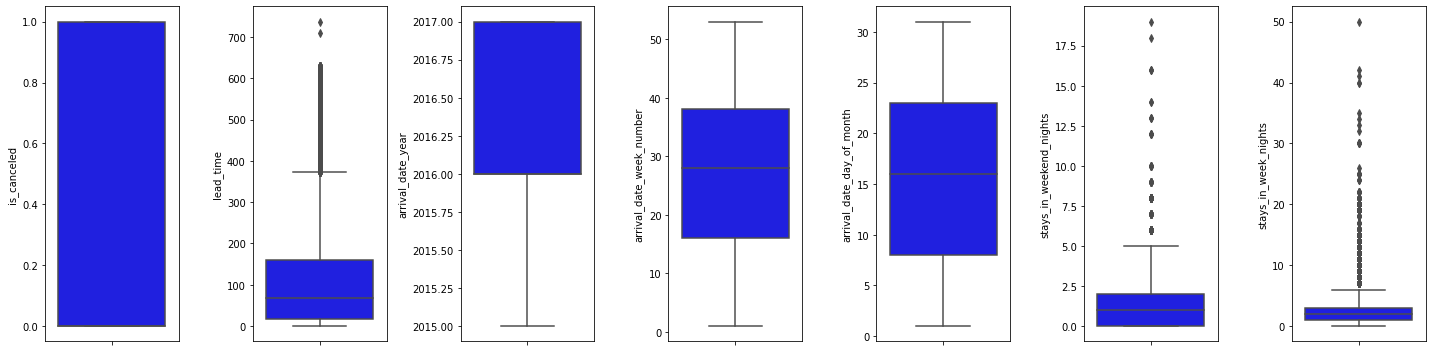

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num1)):
    plt.subplot(1, len(num1), i+1)
    sns.boxplot(y=df[num1[i]], color='blue', orient='v')
    plt.tight_layout()
plt.show()

In [ ]:
num2 = num[7:13]

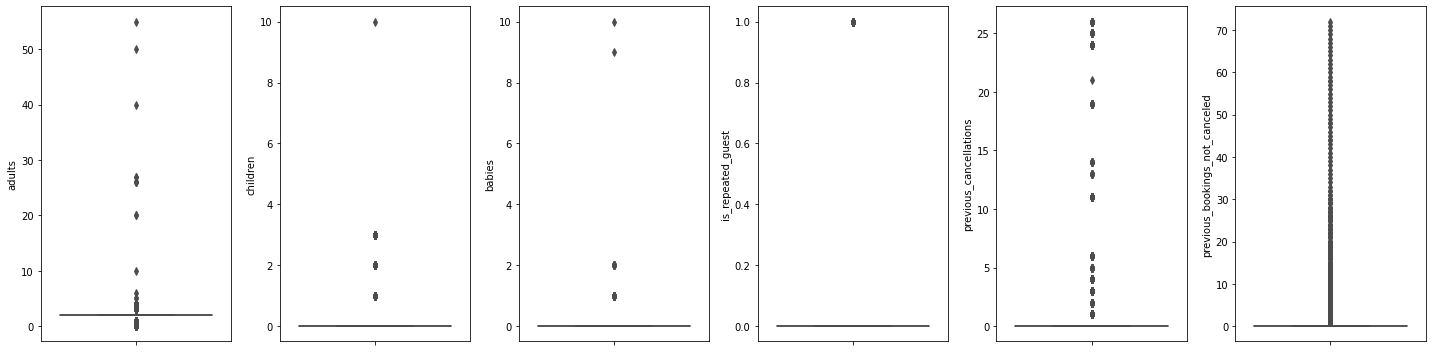

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num2)):
    plt.subplot(1, len(num2), i+1)
    sns.boxplot(y=df[num2[i]], color='blue', orient='v')
    plt.tight_layout()
plt.show()

In [ ]:
num3 = num[13:]

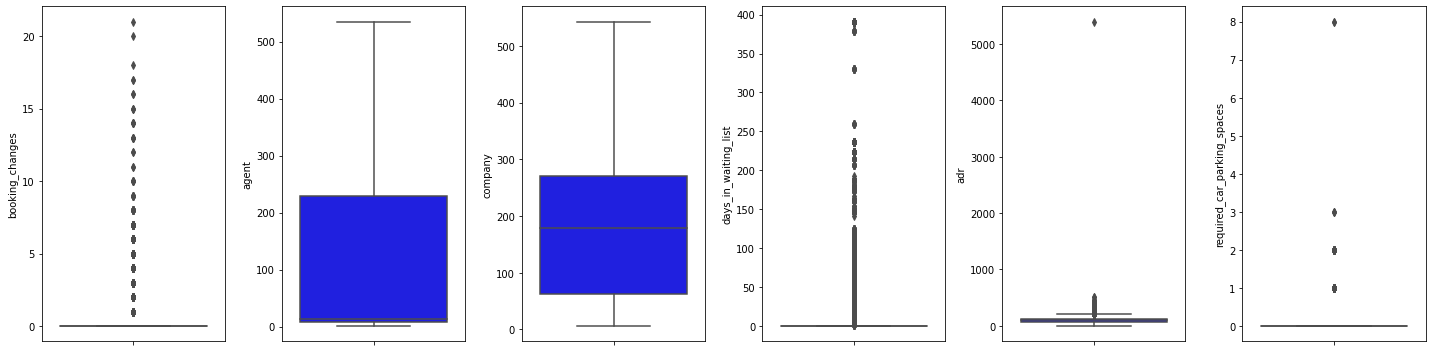

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num3)):
    plt.subplot(1, len(num3), i+1)
    sns.boxplot(y=df[num3[i]], color='blue', orient='v')
    plt.tight_layout()
plt.show()

**Hal terpenting yang harus diperhatikan dari visualisasi boxplot di atas adalah keberadaan outliers**

*   Mayoritas kolom nums masih memiliki outlier. Tapi sepertinya nilai outlier ini dapat memberikan banyak informasi berguna, jadi kami tidak melakukan data cleaning outlier, melainkan feature engineering atau membuat kolom baru kemudian menggunakan metode z-score.
*   Outlier yang akan dihapus adalah yang ada di kolom ADR karena tampaknya memiliki satu nilai yang sangat berbeda 
*   Dari visualisasi boxplot di atas terlihat bahwa sebagian besar kolom memiliki distribusi yang miring (skewed distribution), kecuali kolom arrival_date_day_of_month, arrival_date_week_number

Text(0, 0.5, 'adr')

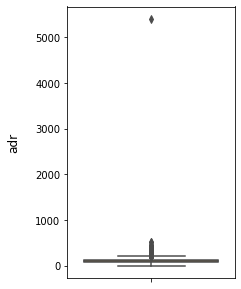

In [ ]:
#boxplot adr 
plt.figure(figsize=(3, 5))
sns.boxplot(y='adr', data = df, color='orange', orient='v')
plt.ylabel('adr', fontsize=12, labelpad=15)

Dari visualisasi boxplot di atas dapat diketahui **kolom 'adr' memiliki satu outlier yang cukup ekstrim bernilai 5400.** Data 'adr' yang lain berada di bawah 1000

#### Cek Distribusi

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

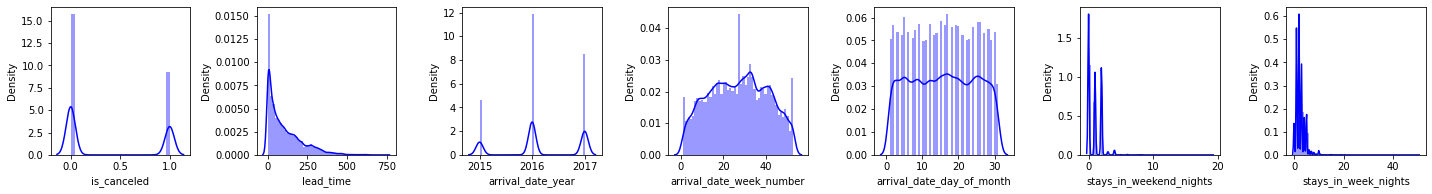

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num1)):
    plt.subplot(2, len(num1), i+1)
    sns.distplot(df[num1[i]], color='blue')
    plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

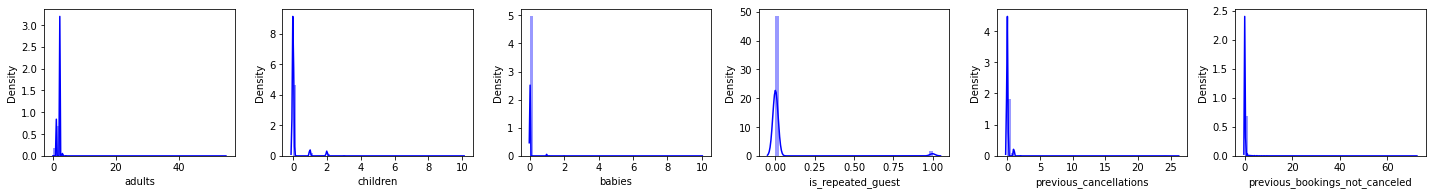

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num2)):
    plt.subplot(2, len(num2), i+1)
    sns.distplot(df[num2[i]], color='blue')
    plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

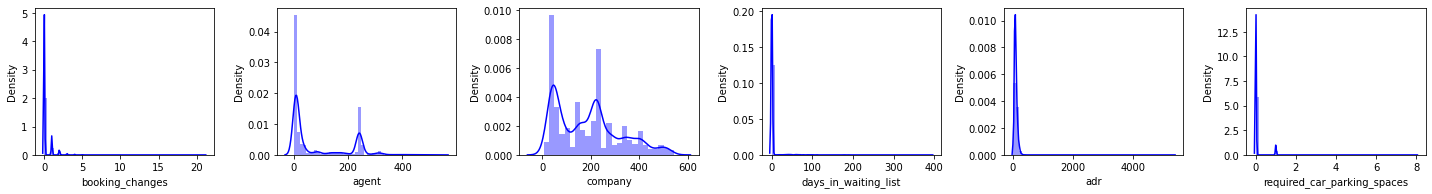

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num3)):
    plt.subplot(2, len(num3), i+1)
    sns.distplot(df[num3[i]], color='blue')
    plt.tight_layout()
plt.show()

**Hal terpenting yang harus diperhatikan dari visualisasi displot di atas adalah bentuk distribusinya**

Seperti yang kita duga di visualisasi boxplot, sebagian besar kolom memiliki distribusi miring (skewed distribution), yaitu lead time, stays_weekend_nights, stay_in_week_nights, adults, chidlren, babies, is_repeat_guest, previous_cancellations, previous_booking_not_cancelled, booking_changes, days_in_waiting_list, adr, dan required_car_parking_spaces

**Dari visualisasi displot di atas diketahui kolom-kolom skewed ini adalah right skewed sehingga akan dilakukan log transformation pada tahap data pre-processing**


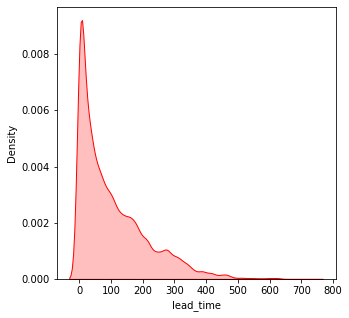

In [ ]:
#distribusi lead_time
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x='lead_time', color='red', shade=True)

Dari visualisasi kdeplot di atas dapat kita lihat bahwa **kolom 'lead_time' memiliki distribusi yang positive skewed**. Dari visualisasi juga dapat kita lihat terjadi sedikit lonjakan pada lead_time mendekati 300 hari. 'lead_time' juga terus memiliki ekor hingga melebihi angka 700 yang berarti ada customer yang memesan untuk lebih dari 700 hari yang akan datang.

#### Cek Outlier dan Distribusi

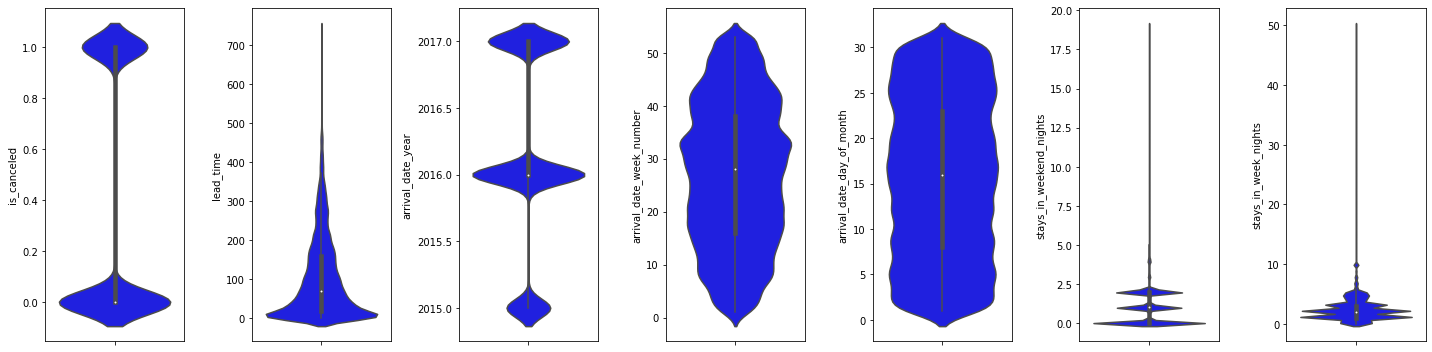

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num1)):
    plt.subplot(1, len(num1), i+1)
    sns.violinplot(y=df[num1[i]], color='blue', orient='v')
    plt.tight_layout()

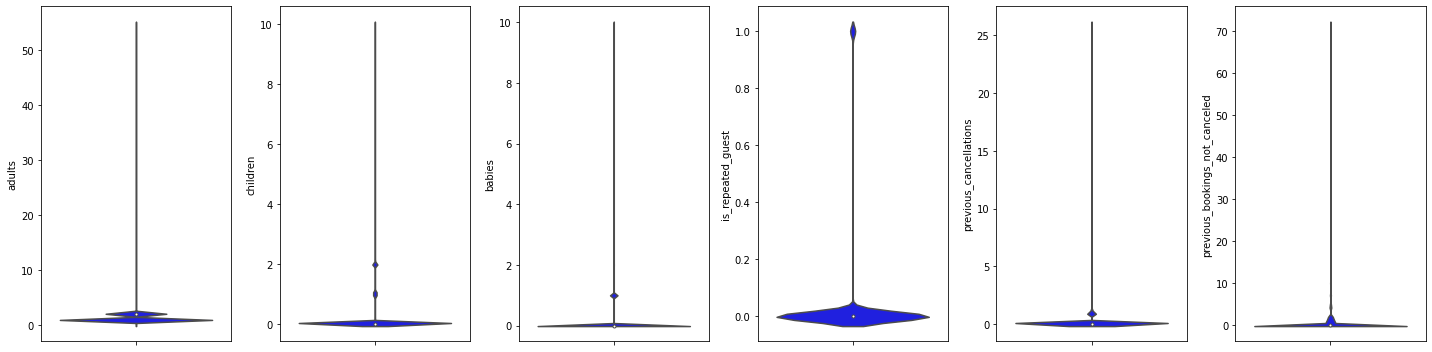

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num2)):
    plt.subplot(1, len(num2), i+1)
    sns.violinplot(y=df[num2[i]], color='blue', orient='v')
    plt.tight_layout()

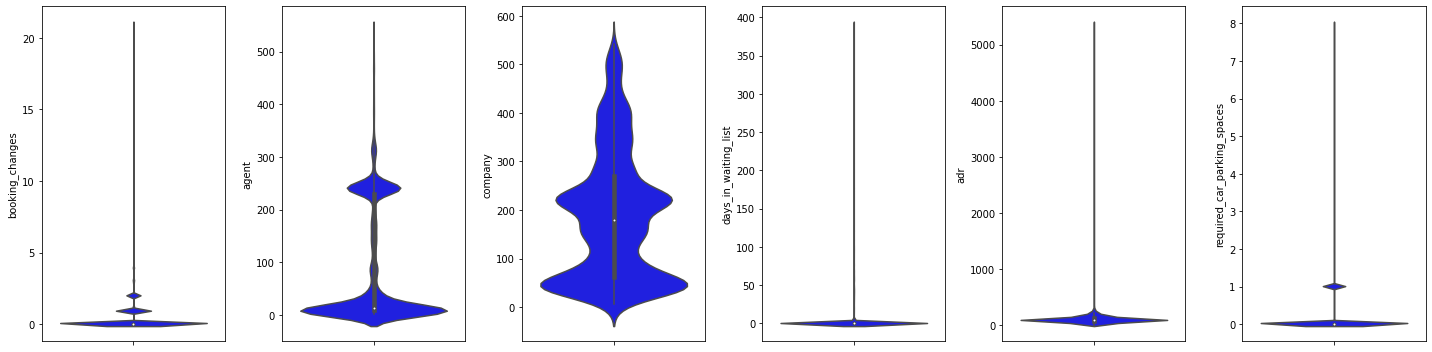

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num3)):
    plt.subplot(1, len(num3), i+1)
    sns.violinplot(y=df[num3[i]], color='blue', orient='v')
    plt.tight_layout()

### Untuk Kategori

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

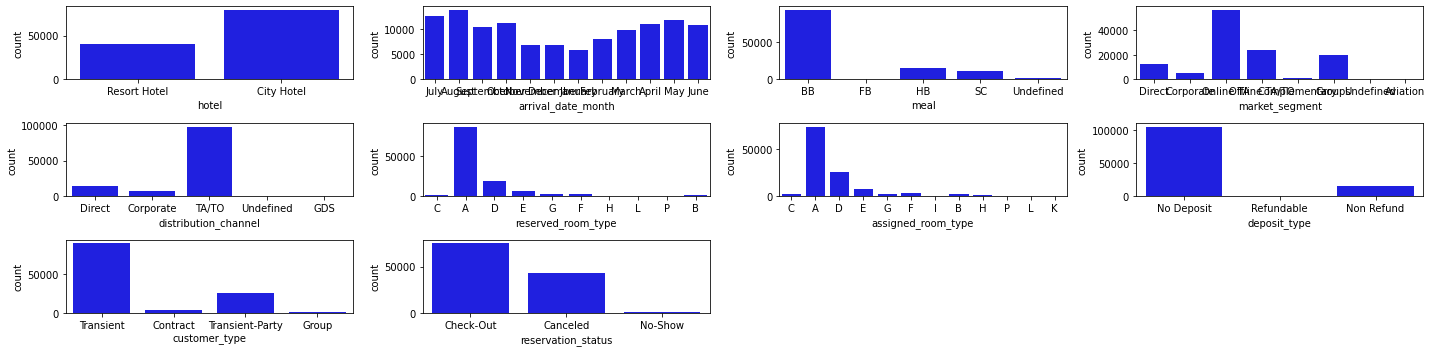

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(cat)):
    plt.subplot(3, 4, i+1)
    sns.countplot(df[cat[i]], color='blue', orient='h')
    plt.tight_layout()

**Hal terpenting yang harus diperhatikan dari visualisasi subplot di atas adalah adanya value dominan dibeberapa kolom**
- customer paling banyak memesan melalui Online TA
- Room type A adalah kamar yang paling banyak dipesan
- No Deposit menjadi deposite type yang paling banyak dipilih customer
- Jangan lupa menghapus value undefined di kolom meal, market_segment, distribusi_channel

## Multivariate Analysis

In [ ]:
df.corr()

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   
previous_bookings_not_canceled    -0.057358  -0.073548           0.029218   
booking_changes                   -0.144381   0.000149           0.030872   
agent                             -0.083114  -0.069741           0.063457   
company                           -0.020642   0.151464           0.259095   
days_in_waiting_list               0.054186   0.170084          -0.056497   
adr                                0.047557  -0.063077           0.197580   
required_car_parking_spaces       -0.195498  -0.116451          -0.013684   
total_of_special_requests         -0.234658  -0.095712           0.108531   

                                arrival_date_week_number  \
is_canceled                                     0.008148   
lead_time                                       0.126871   
arrival_date_year                              -0.540561   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066809   
stays_in_weekend_nights                         0.018208   
stays_in_week_nights                            0.015558   
adults                                          0.025909   
children                                        0.005518   
babies                                          0.010395   
is_repeated_guest                              -0.030131   
previous_cancellations                          0.035501   
previous_bookings_not_canceled                 -0.020904   
booking_changes                                 0.005508   
agent                                          -0.031201   
company                                        -0.076760   
days_in_waiting_list                            0.022933   
adr                                             0.075791   
required_car_parking_spaces                     0.001920   
total_of_special_requests                       0.026149   

                                arrival_date_day_of_month  \
is_canceled                                     -0.006130   
lead_time                                        0.002268   
arrival_date_year                               -0.000221   
arrival_date_week_number                         0.066809   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016354   
stays_in_week_nights                            -0.028174   
adults                                          -0.001566   
children                                         0.014544   
babies                                          -0.000230   
is_repeated_guest                               -0.006145   
previous_cancellations                          -0.027011   
previous_bookings_not_canceled                  -0.000300   
booking_changes                                  0.010613   
agent                                            0.001487   
company                                          0.044858   
days_in_waiting_list                             0.022728   
adr                                              0.0302

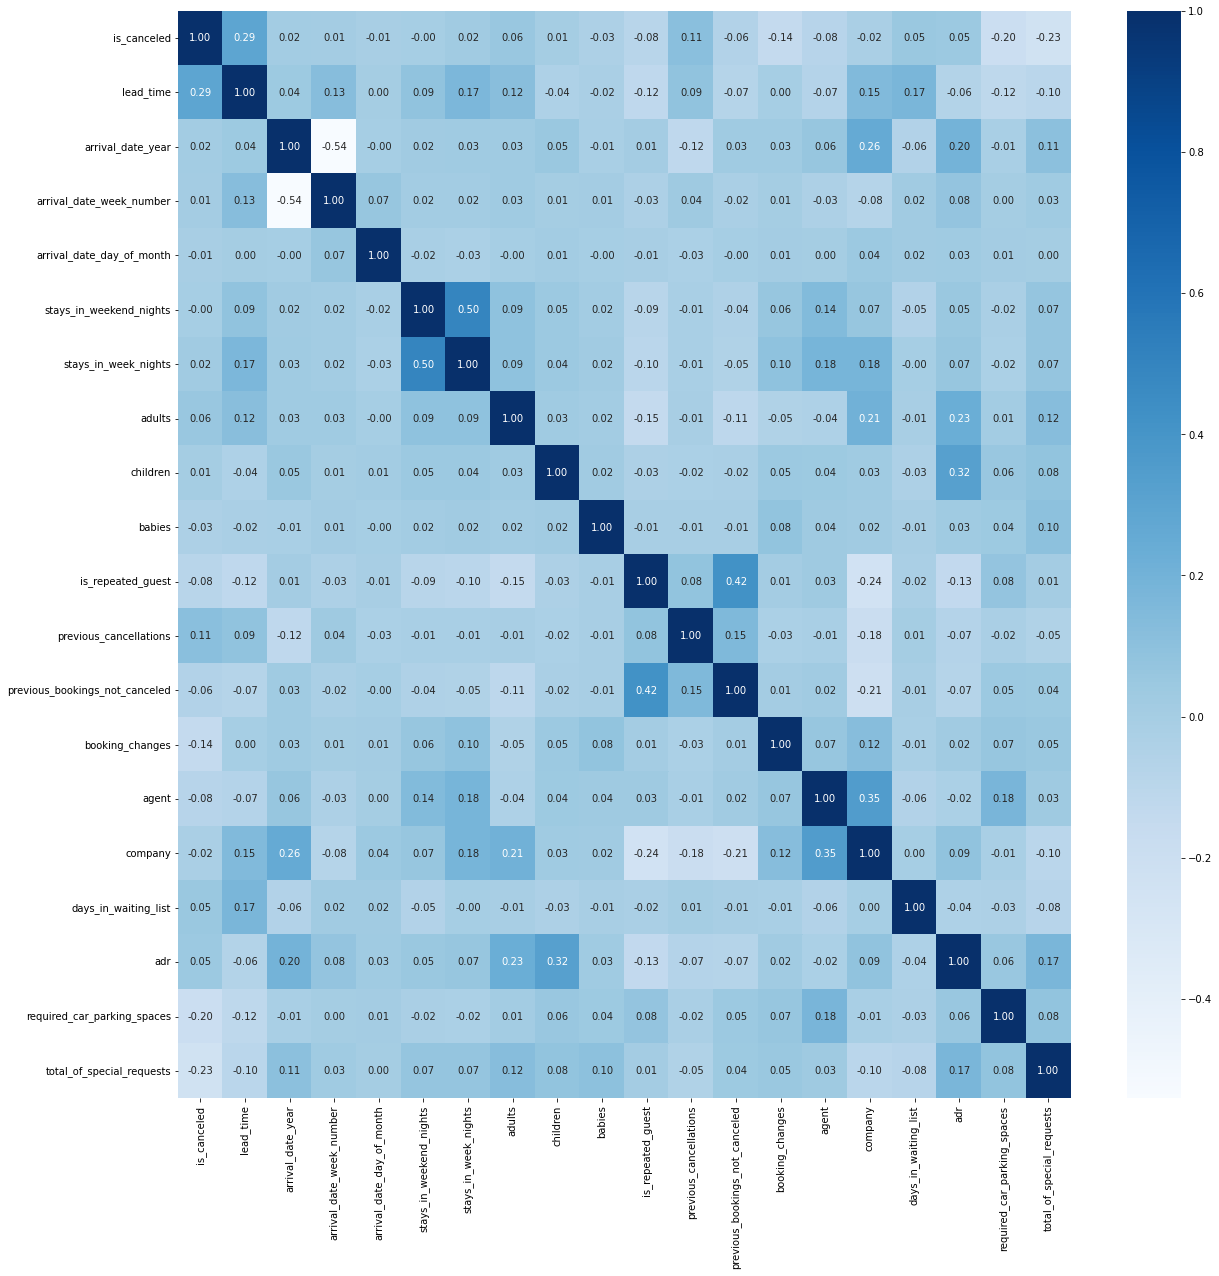

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Dari visualisasi correlation heatmap di atas dapat kita ketahui bahwa:

*   Target kita (is_cancelled) memiliki korelasi tertinggi yang positif yaitu  dengan feature lead_time yaitu 0.29
*   Feature lain yang juga memiliki korelasi positif yang cukup besar dengan target adalah previous_cancellations sebesar 0.11

**Hasil pengamatan : <br>**
A. Korelasi antara feature dan label dapat dilihat dari plot heatmap correlation di atas, beberapa kolom yang memiliki korelasi di bawah 0.05 atau -0.05 dengan label tidak akan terlalu dieksplor pada tahap data preprocessing. Sehingga **fitur yang relevan dan harus dipertahankan untuk dieksplor** yaitu fitur yang memiliki korelasi lebih dari 0.05 atau -0.05 pada **kolom numerik** yaitu lead time, adults, is_repeated_guest, previous_cancellations, previous_booking_not_canceled, booking_changes, agent, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests, sedangkan untuk **kolom categorical** menurut uji chi square, semua kolom memiliki potensi untuk dieksplor. <br>


B. Ditemukan adanya pola yang menarik pada korelasi antar feature yaitu pada feature stay_in_weekend_nights dan stays_in_week_nights serta kedua feature tersebut memiliki korelasi bernilai absolut yang cukup tinggi yaitu 0.5, ada kemungkinan redundan, sehingga akan dilakukan penggabungan kedua feature tersebut menjadi weekend_or_weekdays (berisikan 1 untuk weekend, 0 untuk weekdays?)<br>
Sepertinya reserved_room_types dan assigned_room_types juga bisa digabungkan menjadi assigned_vs_reserved (1 untuk reserved == assigned, 0 untuk reserved != assigned)

<Figure size 1440x720 with 0 Axes>

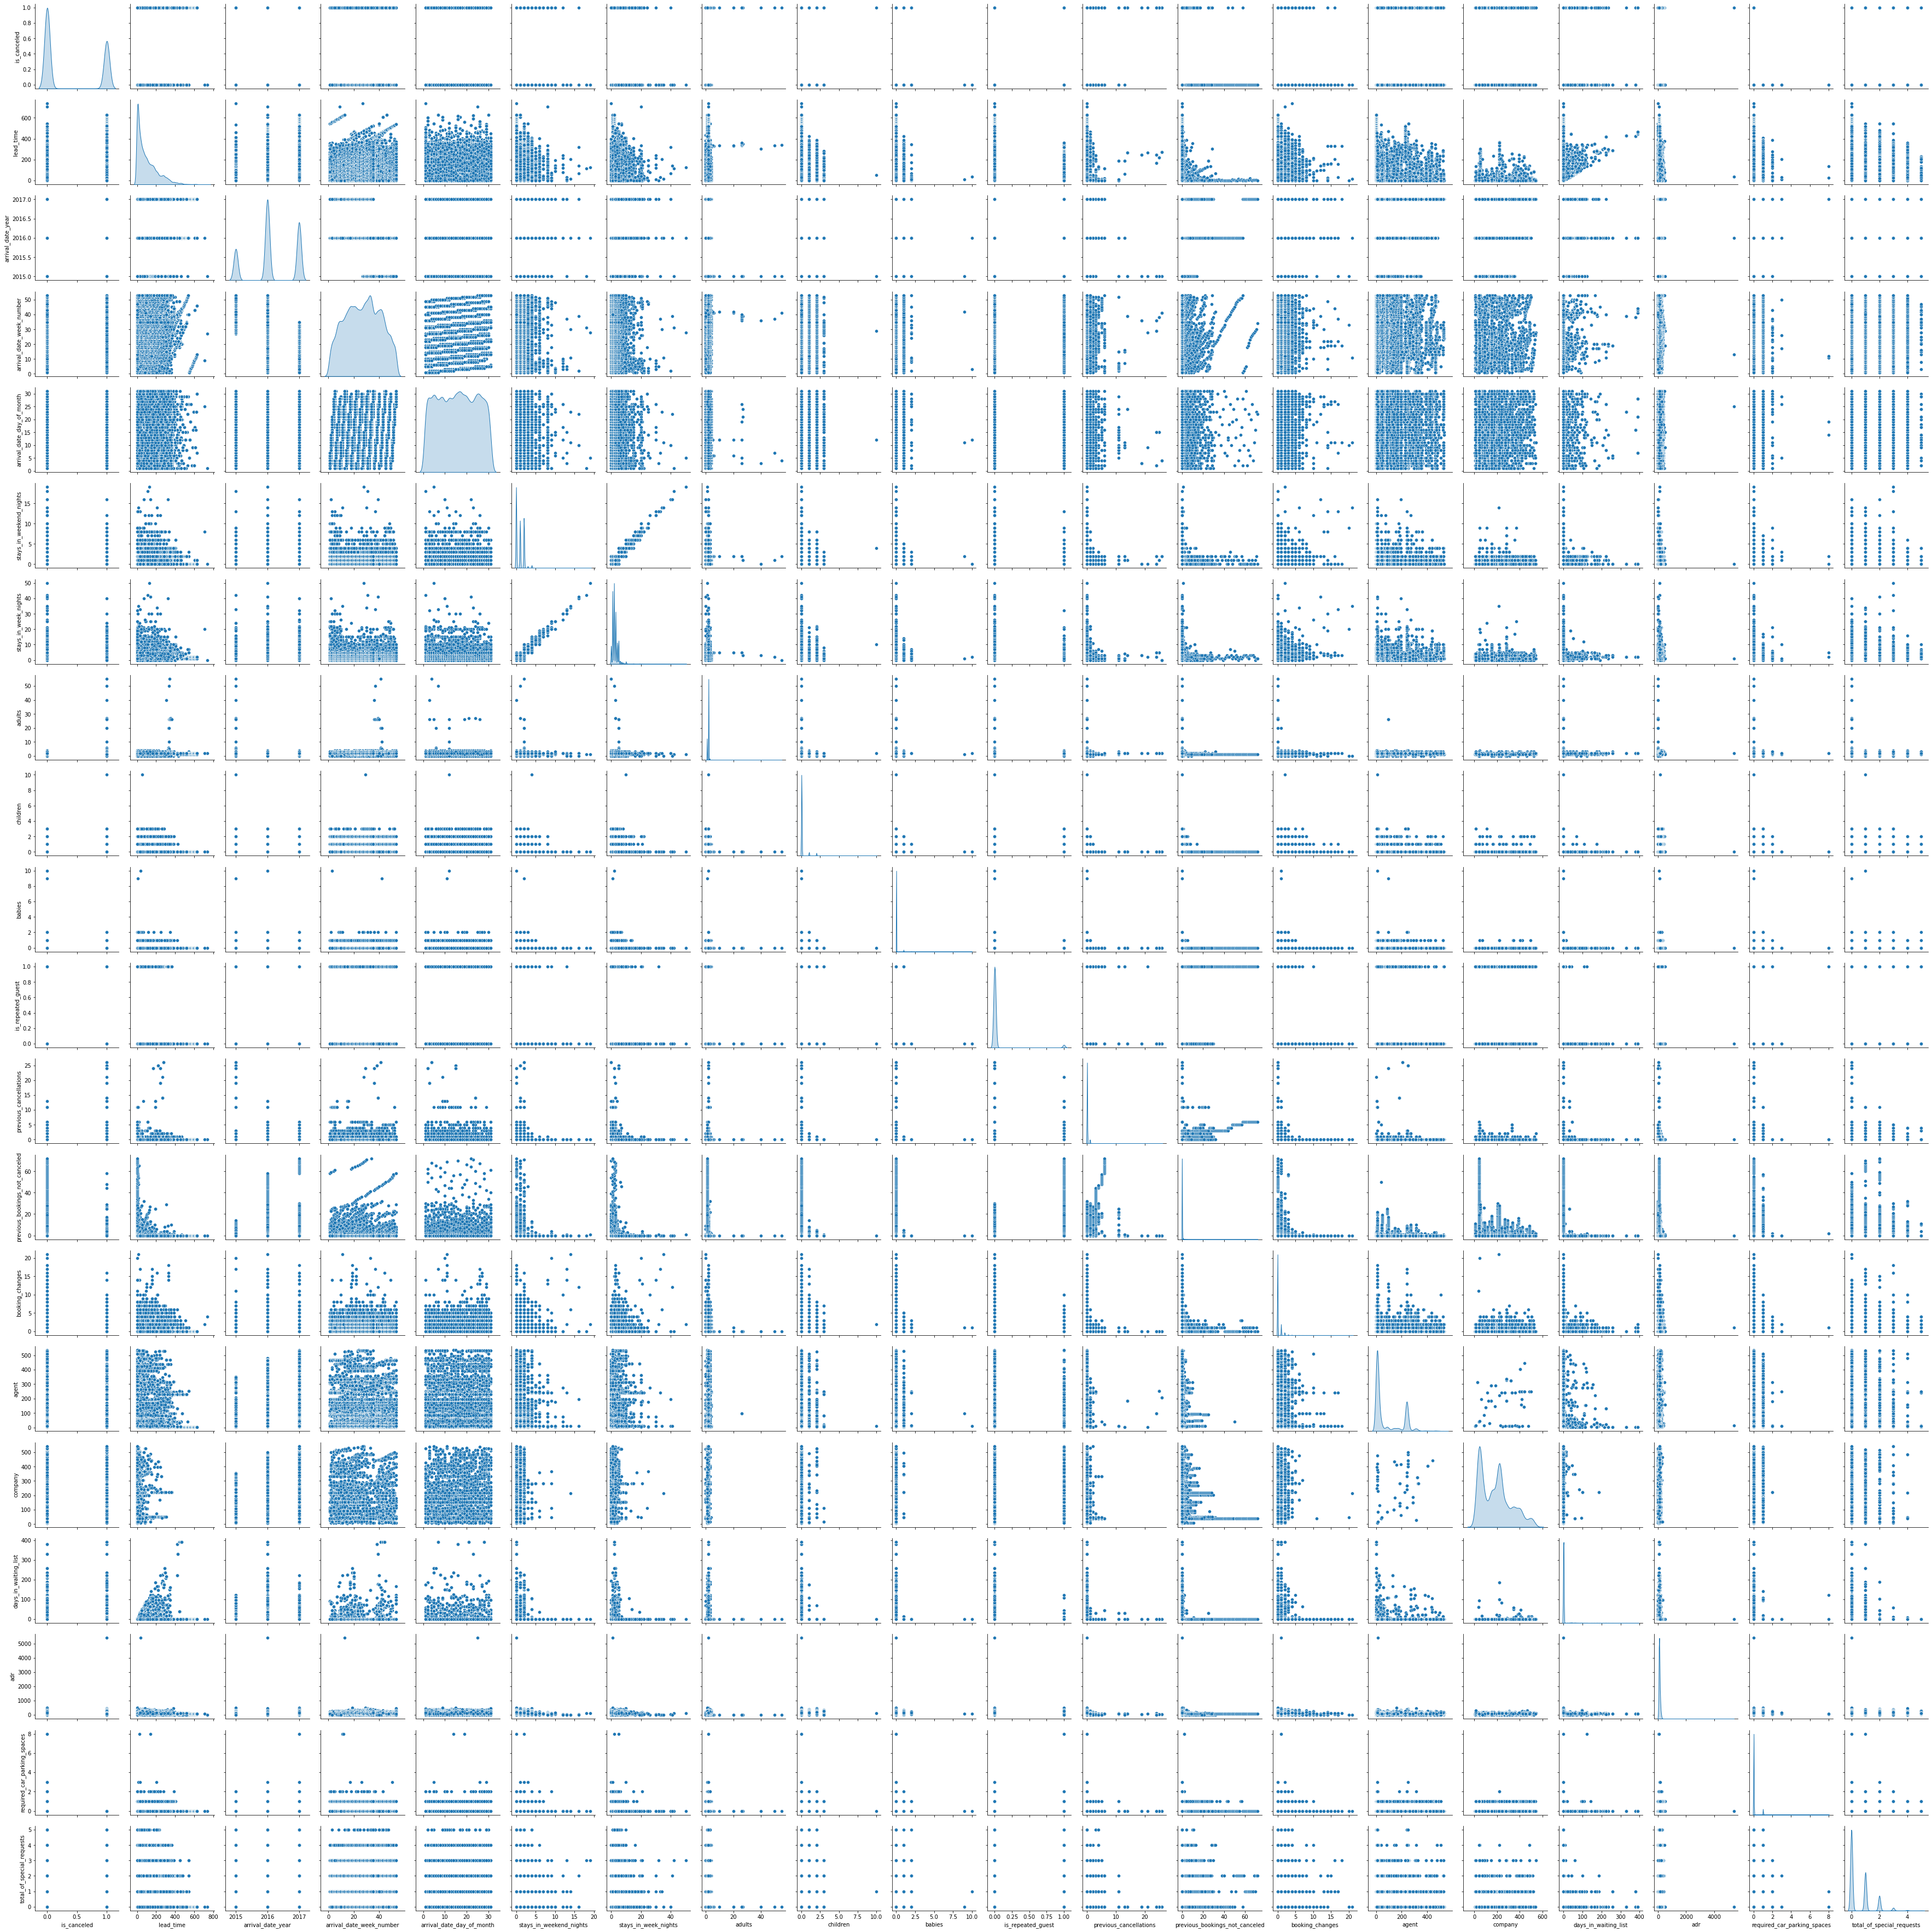

In [ ]:
plt.figure(figsize=(20, 10))
sns.pairplot(df, diag_kind='kde')
plt.show()

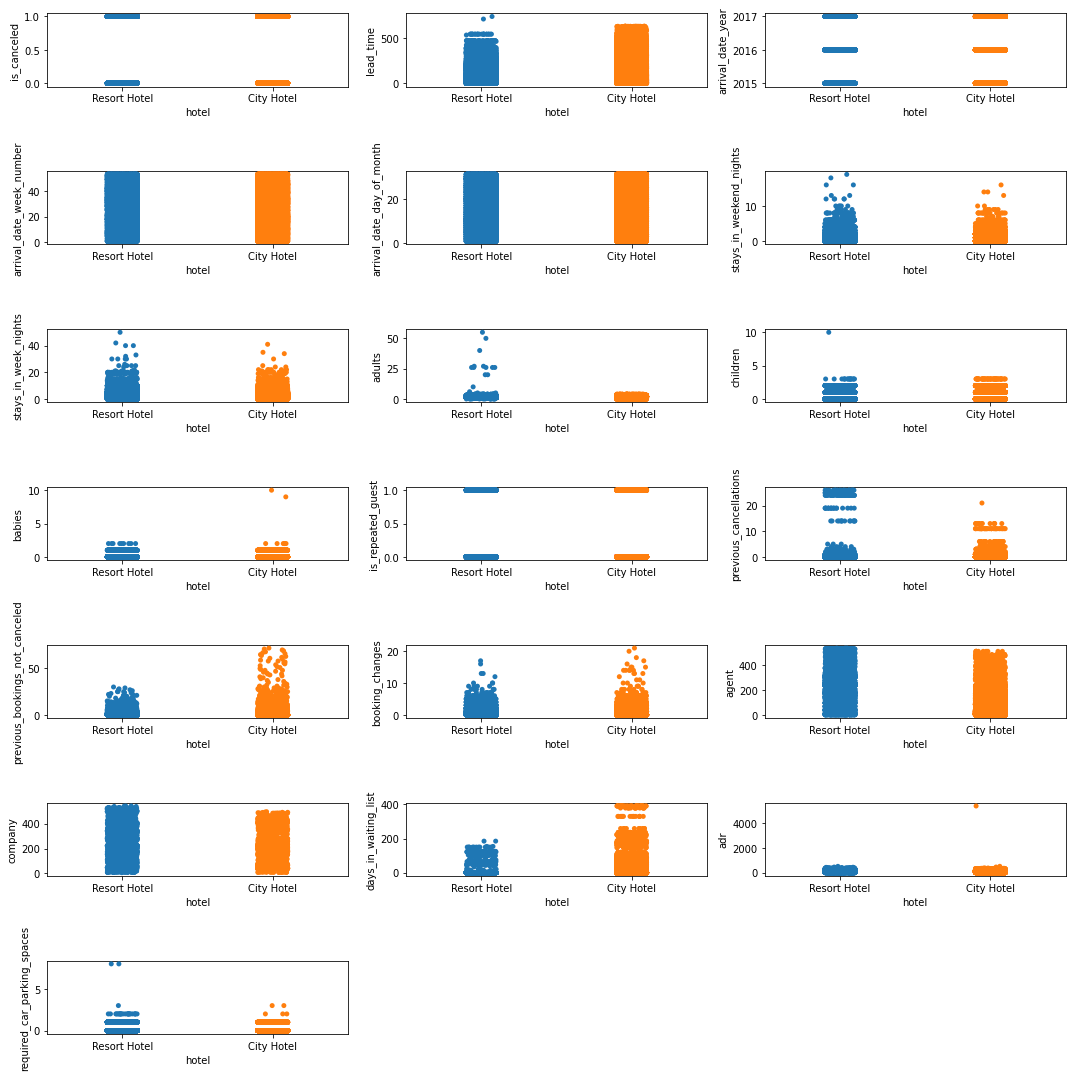

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='hotel', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

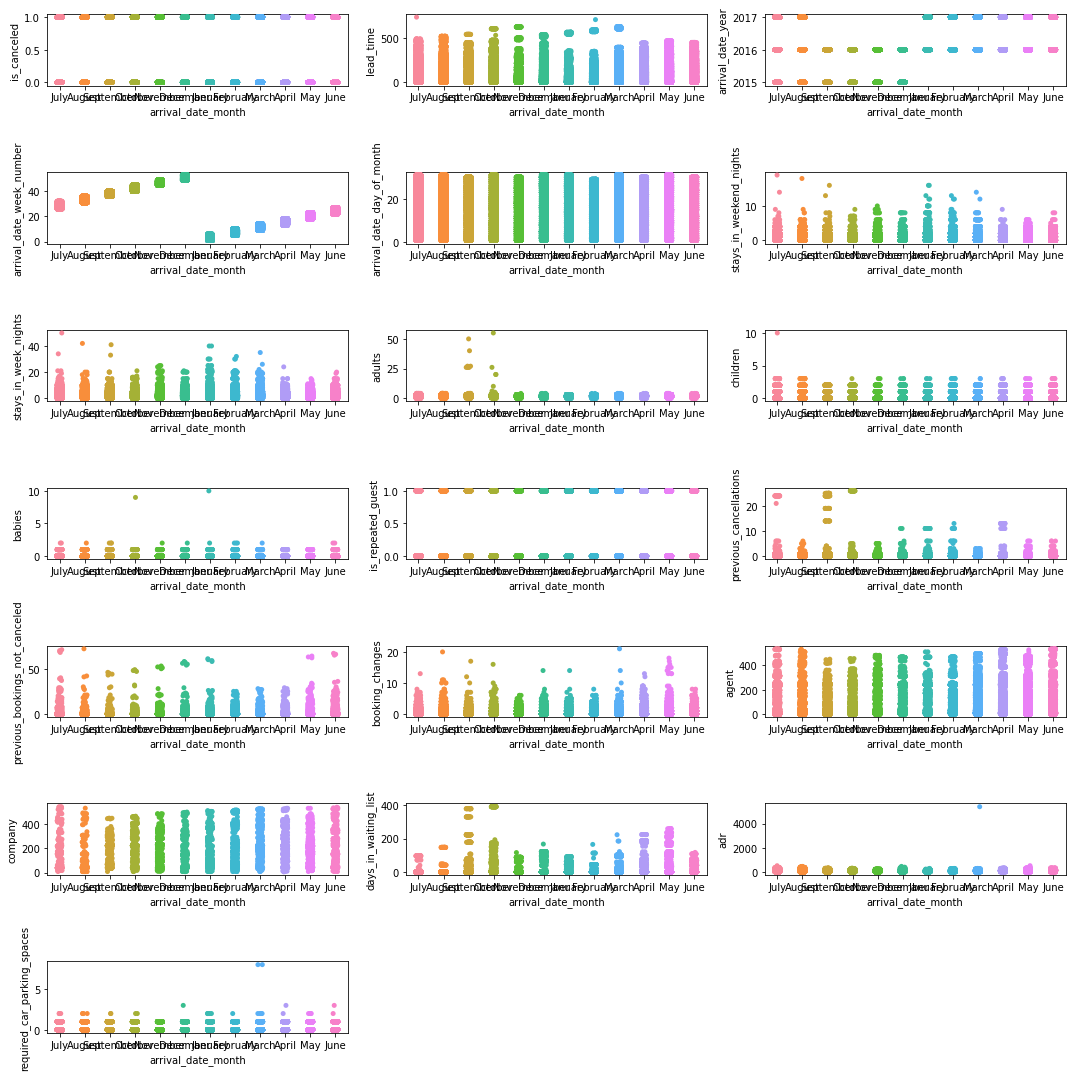

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='arrival_date_month', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

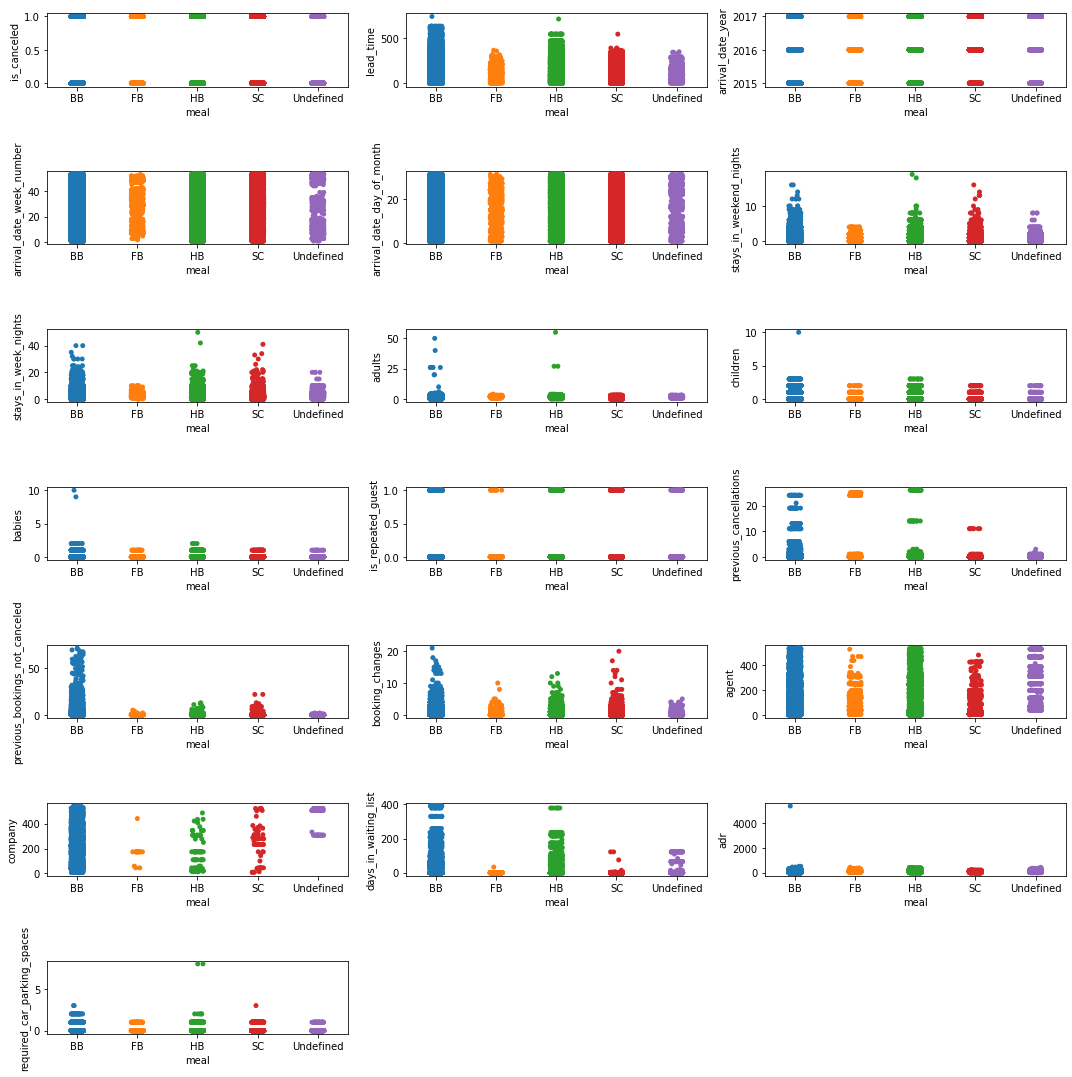

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='meal', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

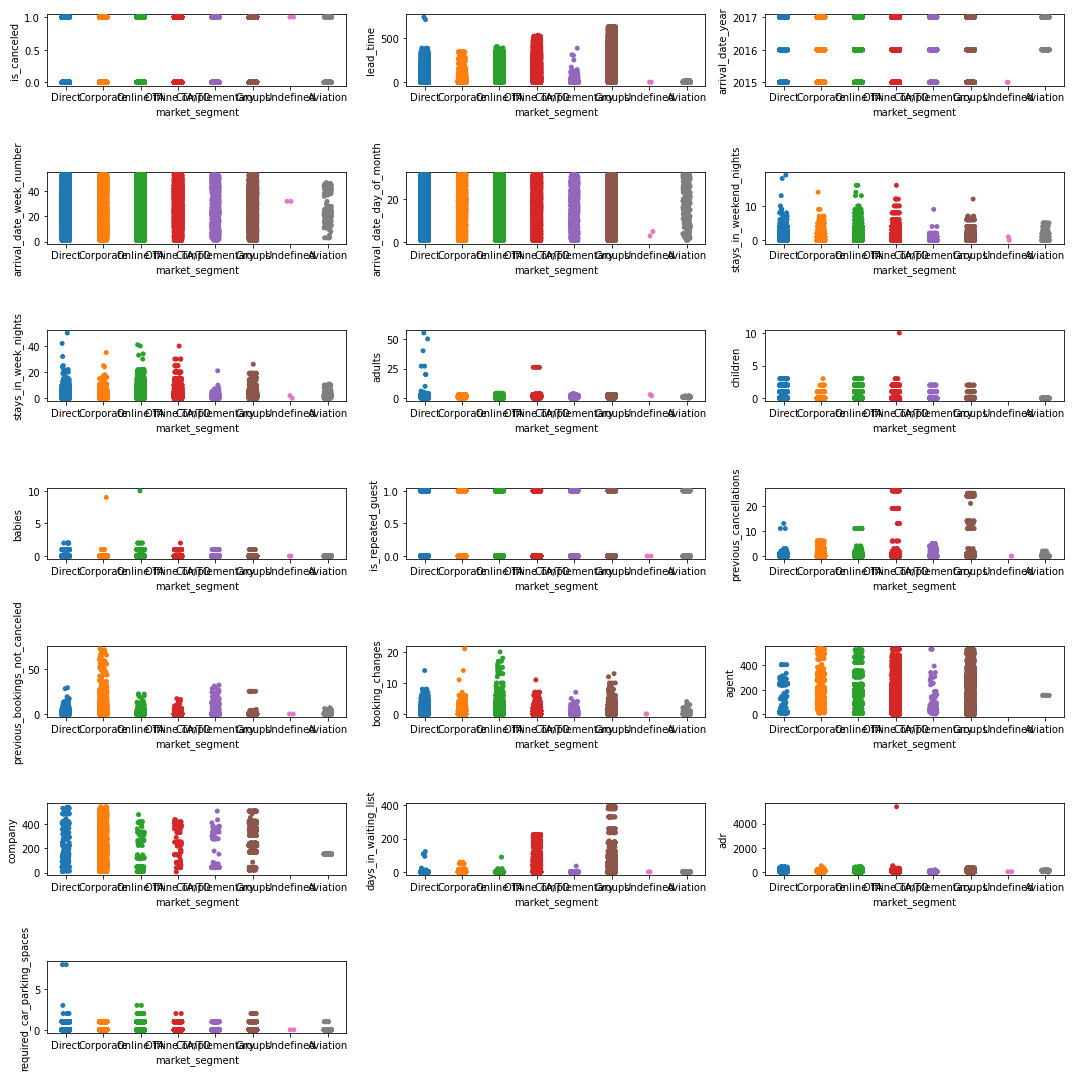

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='market_segment', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

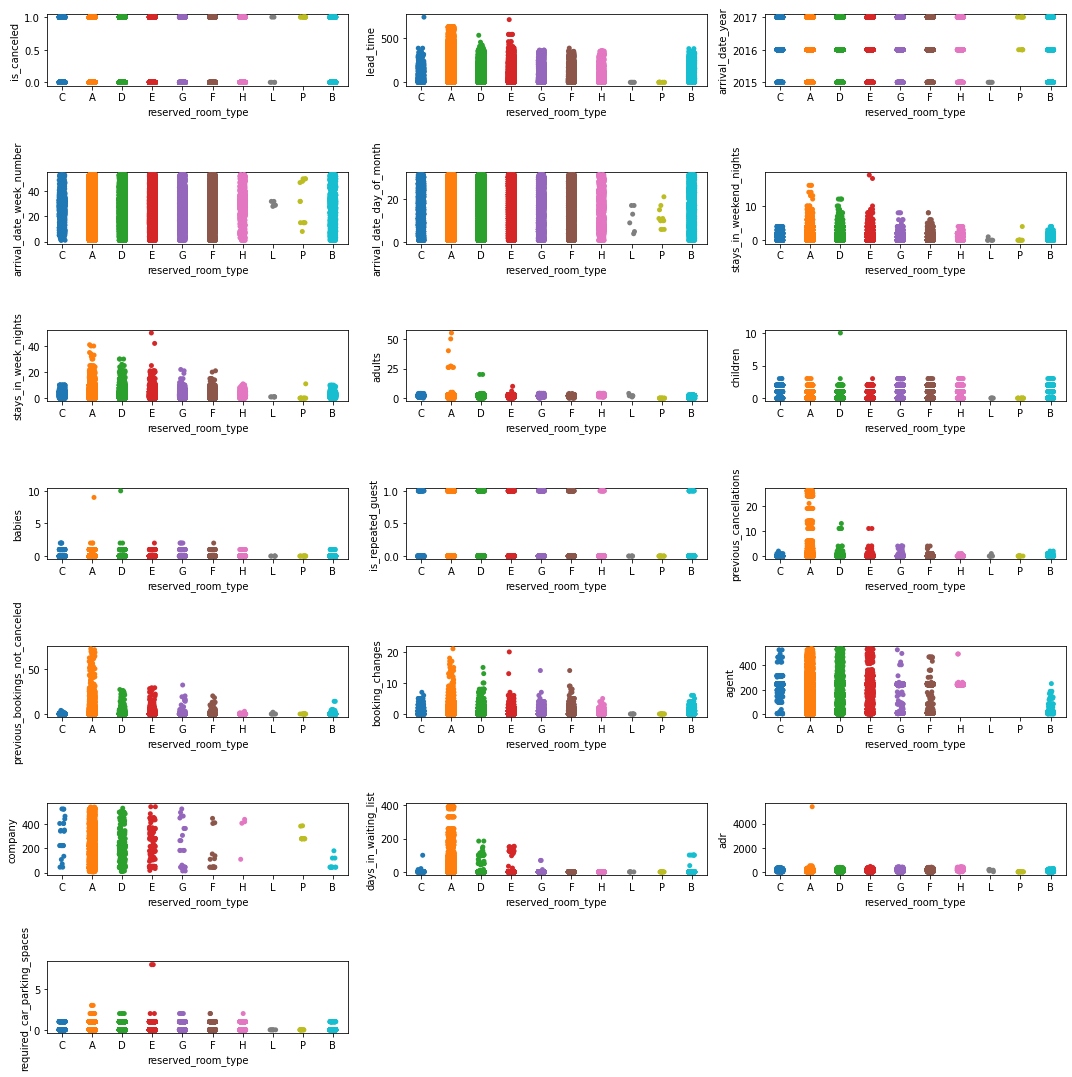

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='reserved_room_type', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

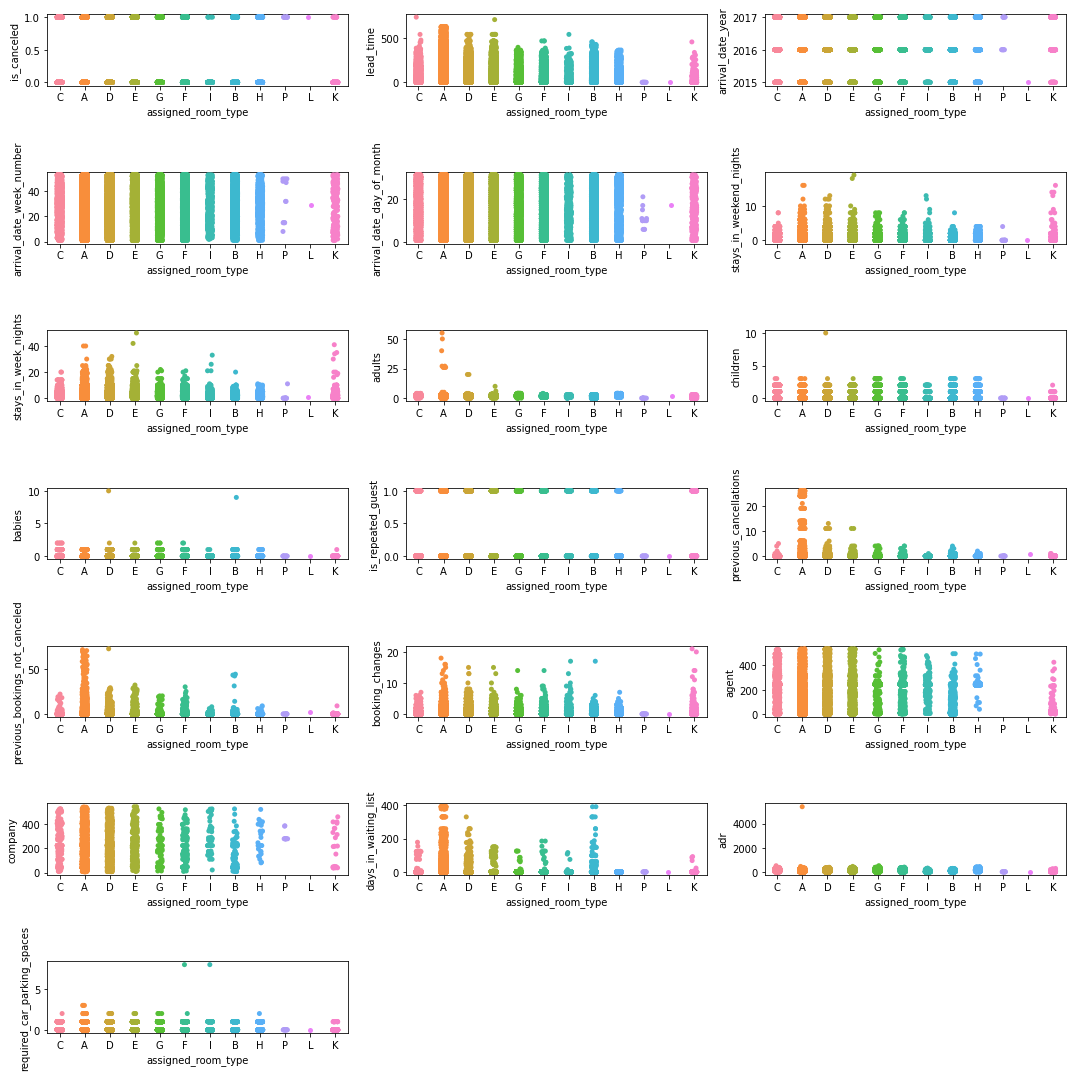

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='assigned_room_type', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

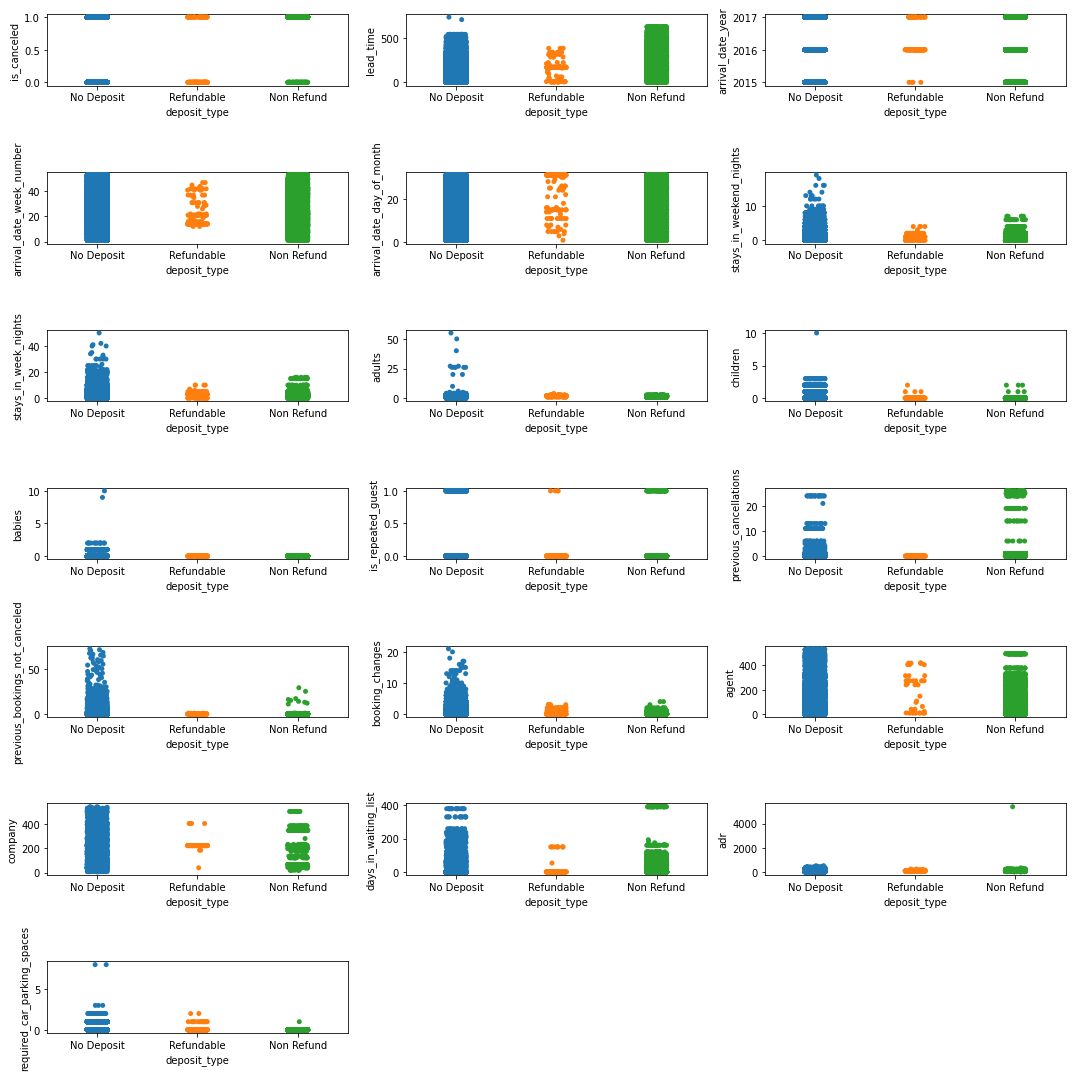

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='deposit_type', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

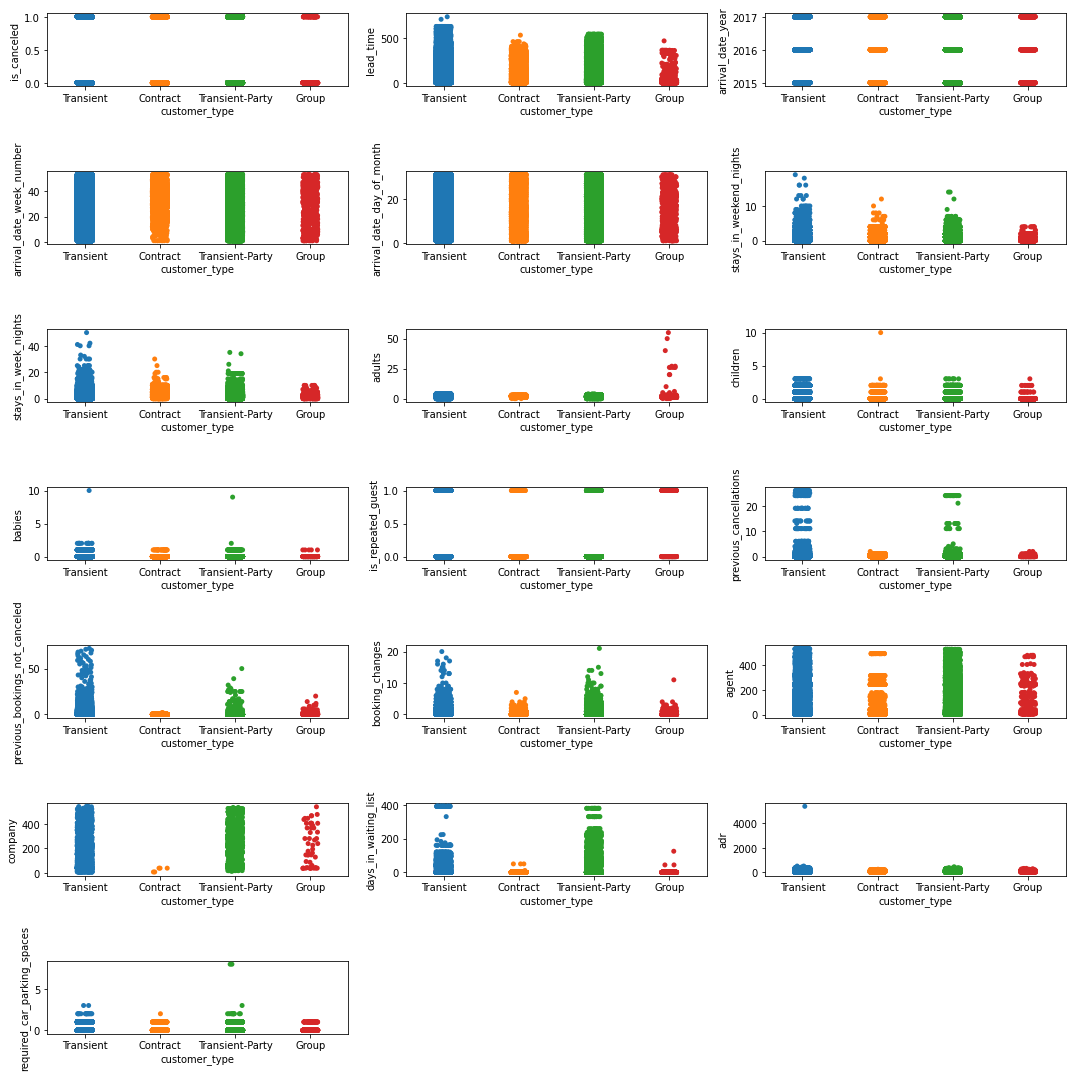

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='customer_type', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

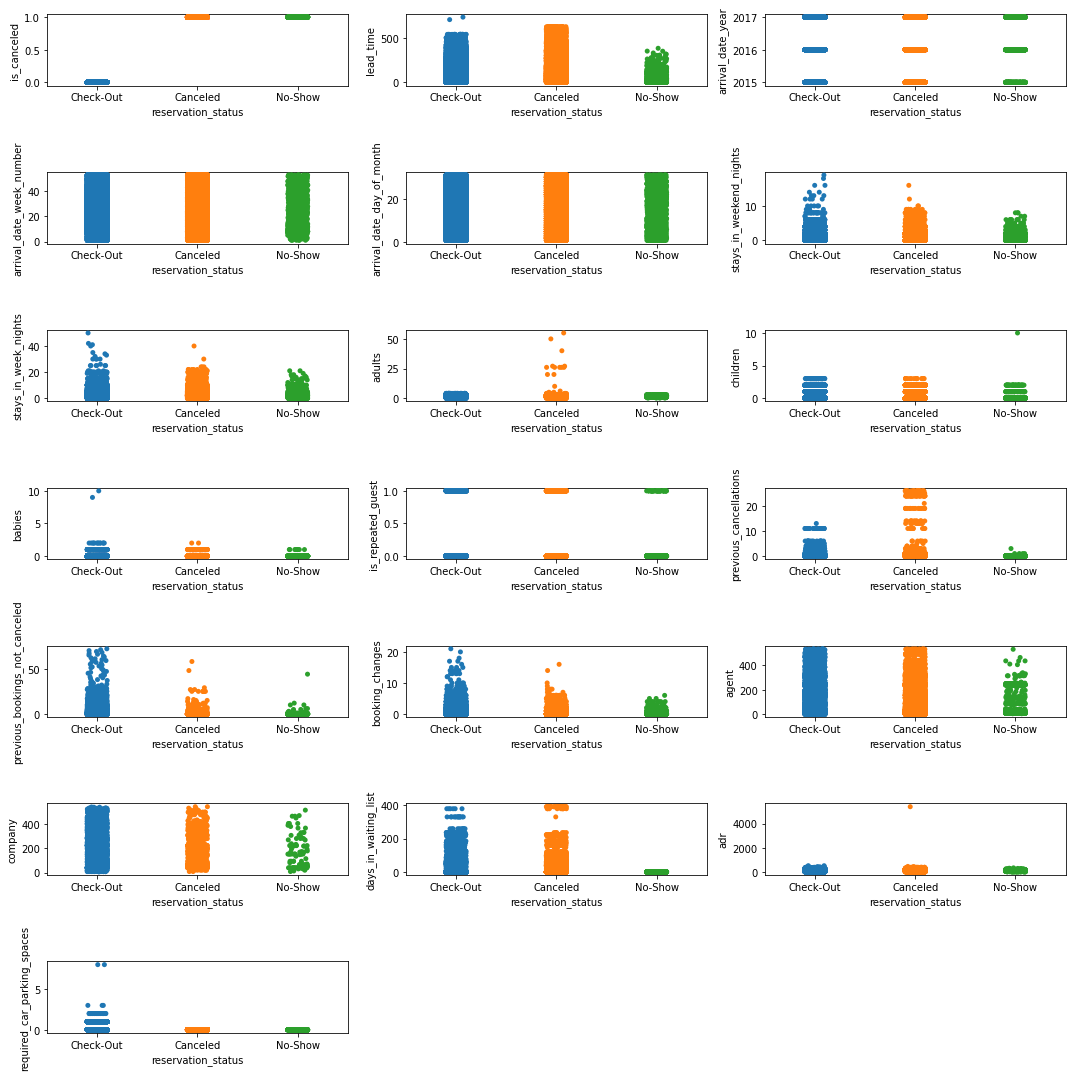

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='reservation_status', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

In [ ]:
! pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 7.4 MB/s 
     |████████████████████████████████| 965 kB 51.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


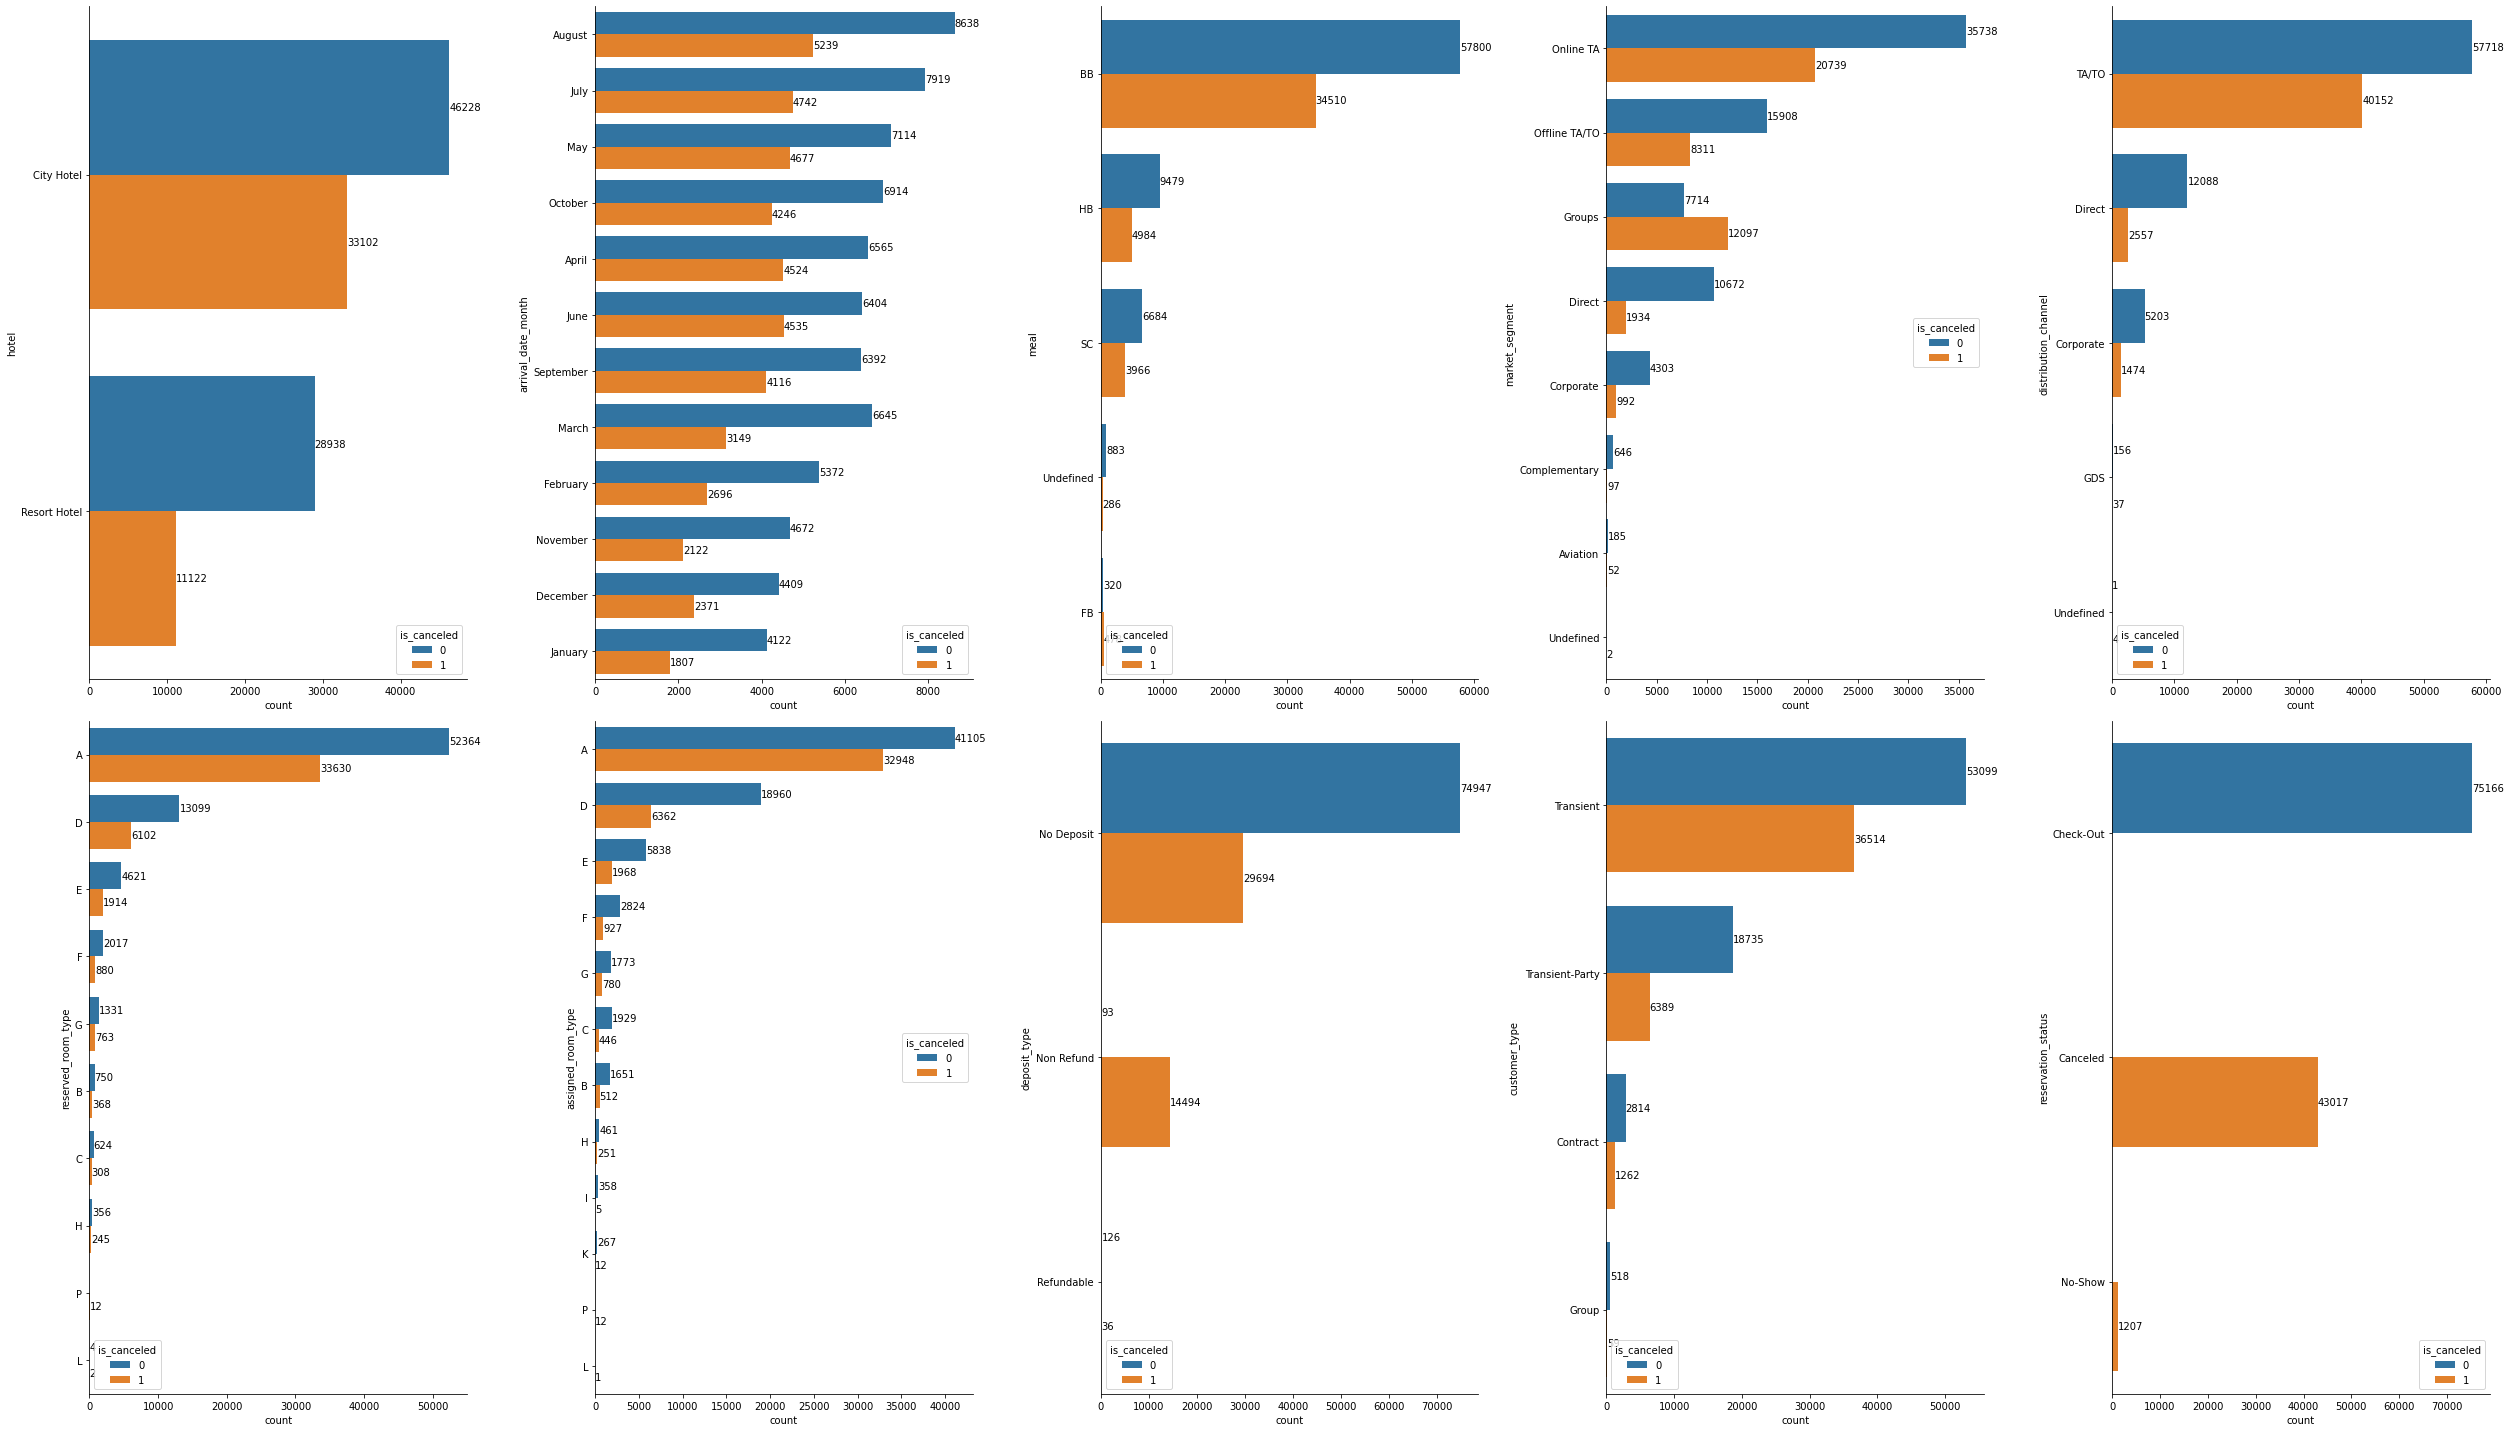

In [ ]:
plt.figure(figsize = (35,20))
for i in range(len(cat)):
    plt.subplot(2, 5, i+1)
    ax = sns.countplot(y = cat[i], hue = 'is_canceled', data = df, order=df[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    sns.despine()
plt.tight_layout()

- Pada kolom city hotel, terlihat bahwa jenis city hotel merupakan jenis yang paling banyak dipesan oleh pelanggan dan juga paling banyak dicancel
- Pada kolom arrival_date_month, bulan agustus menjadi bulan yang paling banyak dipilih pelanggan dan paling banyak terjadi cancel
- Pada kolom meal, secara keseluruhan jenis BB paling banyak dipilih dibandingkan dengan jenis lainnya, sehingga cancel juga banyak terjadi pada pelanggan yang memilih jenis BB
- Pada kolom market segment dan distribution channel didominasi oleh customer yang menggunakan travel agent/tour operator untuk melakukan booking. Hal ini membuktikan bahwa customer lebih menyukai reservasi dengan menggunakan platform travel agengt/tour operator
- Pada kolom reserved_room_type dan assigned_room_type menunjukkan bahwa customer lebih menyukai memesan room type A dibandingkan dengan room lainnya.
- Pada kolom deposit type didominasi oleh customer yang melakukan reservasi tanpa deposit.
- Pada kolom customer type, didominasi oleh tipe customer transient yaitu tipe customer yang melakukan reserverasi untuk waktu yang singkat

## Business Insight

### cancel - lead time

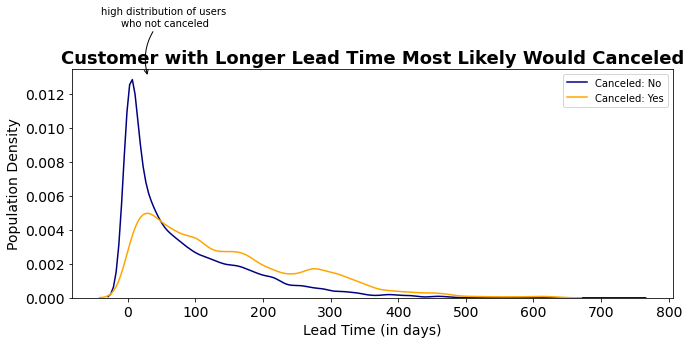

In [ ]:
# mencari hubungan antara lead_time dengan is_cancelled

fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['is_canceled'] == 0]['lead_time'].dropna(), color= 'navy', label= 'Canceled: No', ax=ax)
sns.kdeplot(df[df['is_canceled'] == 1]['lead_time'].dropna(), color= 'orange', label= 'Canceled: Yes', ax=ax)

ax.set_title('Customer with Longer Lead Time Most Likely Would Canceled',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Lead Time (in days)', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylabel('Population Density')
plt.legend()

ax.annotate('high distribution of users \nwho not canceled', 
            xy=(30, 0.013), xytext=(55, 0.016), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center')

plt.tight_layout()

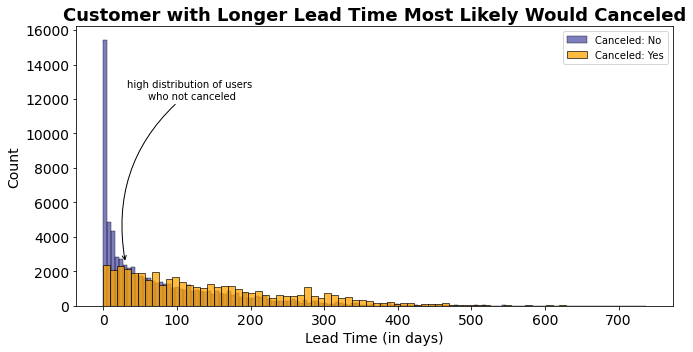

In [ ]:
# mencari hubungan antara lead_time dengan is_cancelled

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(df[df['is_canceled'] == 0]['lead_time'].dropna(), color= 'navy', label= 'Canceled: No', ax=ax, alpha=0.5)
sns.histplot(df[df['is_canceled'] == 1]['lead_time'].dropna(), color= 'orange', label= 'Canceled: Yes', ax=ax)

ax.set_title('Customer with Longer Lead Time Most Likely Would Canceled',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Count', fontsize=14) # y axis label
ax.set_xlabel('Lead Time (in days)', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()

ax.annotate('high distribution of users \nwho not canceled', 
            xy=(30, 2500), xytext=(120, 12000), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center')

plt.tight_layout()

Customer yang memiliki lead time yang lebih lama memiliki tingkat canceled yang lebih tinggi. Rekomendasi bisnis untuk mengatasi masalah tersebut adalah dengan membuat regulasi minimal open reserved seperti 3 bulan - 6 bulan sebelum hari - H, lebih dari itu open reserved tidak diterima. Hal ini juga akan memudahkan pihak hotel untuk menerapkan pricing room secara dinamis tergantung event/season yang akan terjadi pada tanggal yang di booking oleh konsumen.

### cancel - deposit - lead time

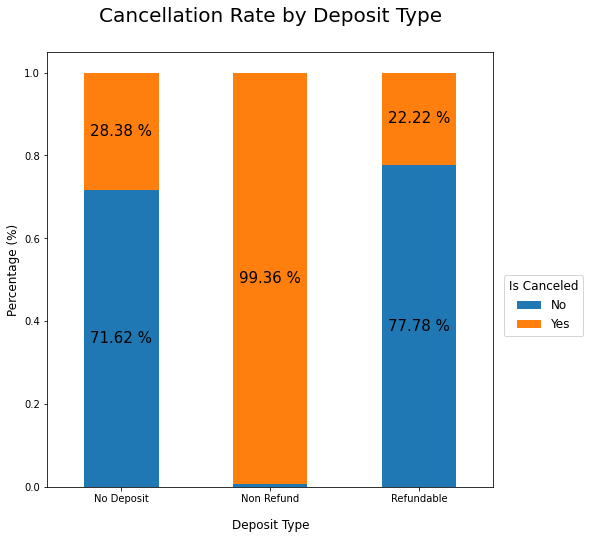

In [ ]:
#cancel - deposite
deposit_ax = pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1    
for i in deposit_ax.patches:
    if j != 2:
      width, height = i.get_width(), i.get_height()
      x, y = i.get_xy() 
      deposit_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
                      fontsize=15)
    j += 1
    
plt.title('Cancellation Rate by Deposit Type', fontsize=20, pad=30)  
plt.xticks(rotation=360)  
plt.xlabel('Deposit Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

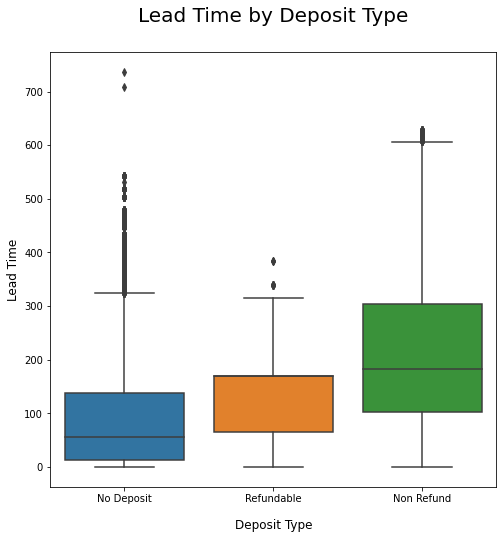

In [ ]:
#lead time - deposite
plt.figure(figsize=(8, 8))
deposit_ax2 = sns.boxplot(x='deposit_type', y='lead_time', data=df)
plt.ylabel('Lead Time', fontsize=12)
plt.xlabel('Deposit Type', fontsize=12, labelpad=15)
plt.title('Lead Time by Deposit Type', fontsize=20, pad=30)
plt.show()

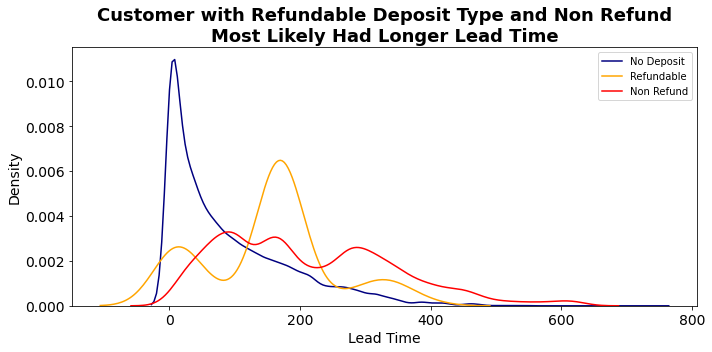

In [ ]:
#melihat persebaran lead time berdasarkan deposit type
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['deposit_type'] == 'No Deposit']['lead_time'].dropna(), color= 'navy', label= 'No Deposit', ax=ax)
sns.kdeplot(df[df['deposit_type'] == 'Refundable']['lead_time'].dropna(), color= 'orange', label= 'Refundable', ax=ax)
sns.kdeplot(df[df['deposit_type'] == 'Non Refund']['lead_time'].dropna(), color= 'red', label= 'Non Refund', ax=ax)
ax.set_title('Customer with Refundable Deposit Type and Non Refund\nMost Likely Had Longer Lead Time',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Lead Time', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()

ax.annotate('high distribution of users \nwho not canceled', 
            xy=(30, 0.013), xytext=(55, 0.016), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center')

plt.tight_layout()

**Pemesanan hotel dengan jenis deposit non refund memiliki cancellation rate terbesar yaitu mencapai 99% dibandingkan dengan jenis deposit lainnya.** 

Salah satu alasannya adalah karena pemesanan hotel dengan jenis deposit non refund memiliki median lead time tertinggi.

Sejalan dengan **rekomendasi bisnis pertama** untuk mengatasi masalah ini adalah dengan membuat regulasi minimal open reserved seperti 3 bulan - 6 bulan sebelum hari - H, lebih dari itu open reserved tidak diterima. Jenis deposit non refund akan diterapkan pada pemesanan dengan lead time lebih dari 6 bulan.



### arrival_date_month

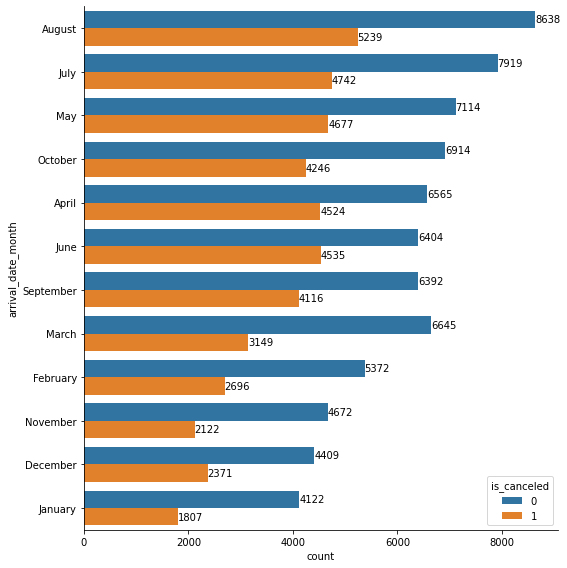

In [ ]:

plt.figure(figsize=(8, 8))
ax = sns.countplot(y = 'arrival_date_month', hue='is_canceled', data=df, order=df['arrival_date_month'].value_counts().index)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
month_dict = {'January':12,'February':11,'March':10, 'April':9, 'May':8, 'June':7, 'July':6, 'August':5, 'September':4, 'October':3, 'November':2, 'December':1}
dff = pd.crosstab(df['arrival_date_month'] , df['is_canceled']).sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))
dff

is_canceled            0     1
arrival_date_month            
December            4409  2371
November            4672  2122
October             6914  4246
September           6392  4116
August              8638  5239
July                7919  4742
June                6404  4535
May                 7114  4677
April               6565  4524
March               6645  3149
February            5372  2696
January             4122  1807

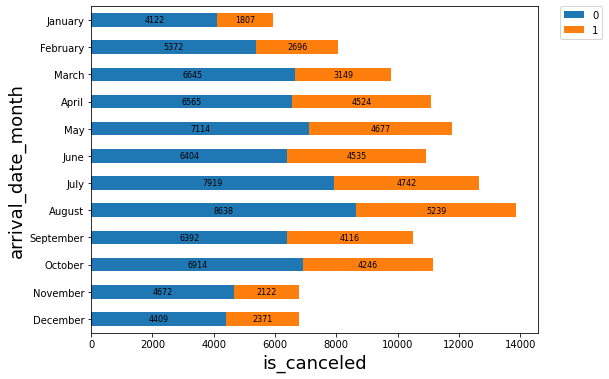

In [ ]:
# plot the dataframe with 1 line
ax = dff.plot.barh(stacked=True, figsize=(8, 6))

# .patches is everything inside of the chart
for month in ax.patches:
    # Find where everything is located
    height = month.get_height()
    width = month.get_width() 
    x = month.get_x()
    y = month.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{width:.0f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel("arrival_date_month", fontsize=18)
ax.set_xlabel("is_canceled", fontsize=18)
plt.show()

**Pemesanan Hotel**

Apabila dilihat dari waktu kedatangan *customer* setiap bulannya, terlihat bahwa mereka paling banyak datang di musim panas (May, July, Agustus). Kemudian di bulan Agustus terbanyak dikarenakan pada bulan tersebut merupakan puncak musim panas. Rekomendasi bisnis untuk insight ini adalah melalukan summer sale untuk menjangkau lebih banyak konsumen serta membuat tingkat cancel lebih rendah.   

# preprocessing

Tahapan ini akan lanjut di preprocessing.ipynb